In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [68]:
df1 =pd.read_csv(r"C:\Users\HP\.jupyter\Google_Stock_Price_Test.csv")

In [69]:
df2 = pd.read_csv(r"C:\Users\HP\.jupyter\Google_Stock_Price_Train.csv")

In [70]:
df = pd.concat([df1, df2], ignore_index=True)

In [71]:
df


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
...,...,...,...,...,...,...
1273,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1274,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1275,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1276,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [72]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [73]:
df.describe()

,Open,High,Low
count,1278.000000,1278.000000,1278.000000
mean,537.994906,542.168897,533.278803
std,154.508365,155.582501,153.174011
min,279.120000,281.210000,277.220000
25%,406.037500,408.230000,403.335000
50%,538.395000,542.330000,534.355000
75%,668.862500,677.705000,662.190000
max,837.810000,841.950000,827.010000


In [74]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [75]:
df = df.dropna()

In [76]:
df = df.drop_duplicates()

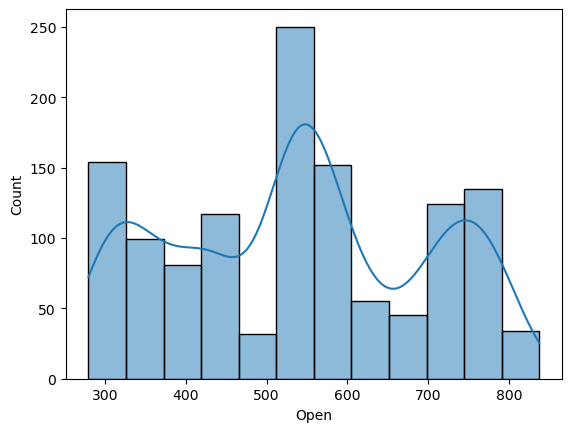

In [77]:
sns.histplot(df['Open'], kde=True)
plt.show()

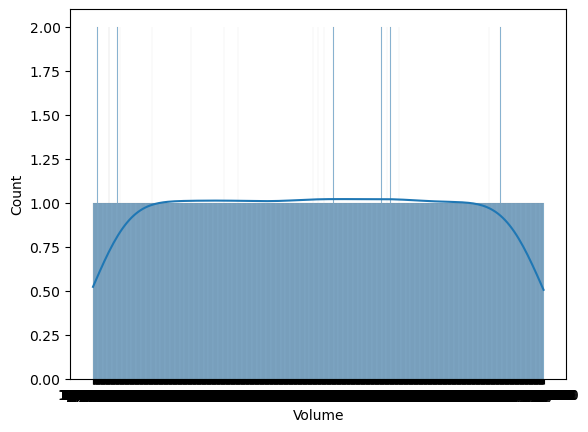

In [78]:
sns.histplot(df['Volume'], kde=True)
plt.show()

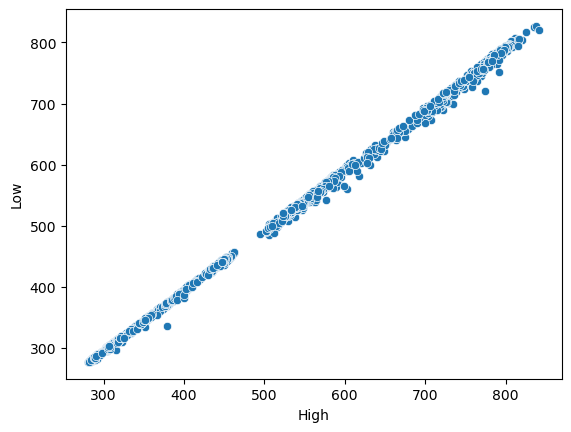

In [79]:
sns.scatterplot(x='High', y='Low', data=df)
plt.show()

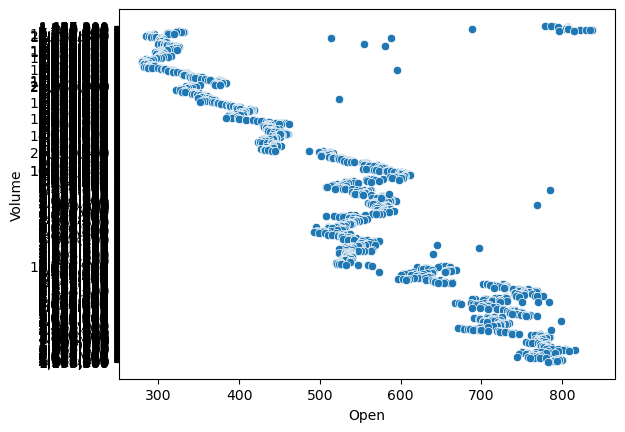

In [87]:
sns.scatterplot(x='Open', y='Volume', data=df)
plt.show()

In [85]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_17648\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low
Open,1.000000,0.999700,0.999517
High,0.999700,1.000000,0.999495
Low,0.999517,0.999495,1.000000


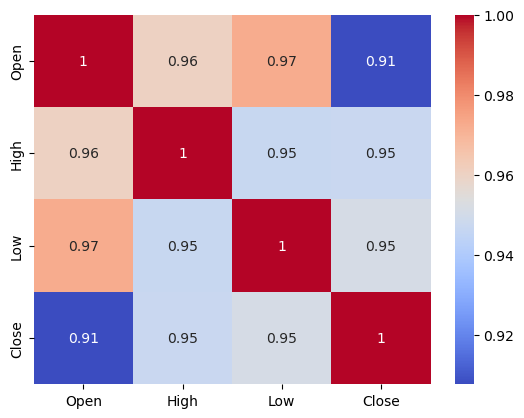

In [88]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [89]:
# Create new features if needed
df['Average'] = df['High'] * df['Low']


In [90]:
df['Average']

0       612594.9540
1       619745.8344
2       623682.6896
3       640018.3800
4       650268.2151
           ...     
1273    624108.3472
1274    628442.4076
1275    622040.9360
1276    612176.5956
1277    603061.5398
Name: Average, Length: 1278, dtype: float64

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [177]:
df['Volume']= pd.to_numeric(df['Volume'].replace(',', ''), errors='coerce')

In [184]:
df['Close'] = pd.to_numeric(df['Close'].str.replace(',', ''), errors='coerce')

In [191]:
df = df.dropna(subset=['Close'])

In [203]:
X=df[['Open','High','Low','Close']]
y=df[['Volume']]

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Open     0
High     0
Low      0
Close    0
dtype: int64
Volume    0
dtype: int64


In [206]:
print(X_train.shape)
print(y_train.shape)


(1006, 4)
(1006, 1)


In [207]:
print(df['Volume'].dtype)
print(df['Volume'].head())


int64
20     7380500
21     5749400
22     6590300
23     5405900
24    11688800
Name: Volume, dtype: int64


In [208]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [209]:
predictions = model.predict(X_test)

In [210]:
predictions

array([[ 1.93585481e+06],
       [ 4.80782069e+06],
       [ 4.31118409e+06],
       [ 4.59346206e+06],
       [ 8.38337991e+05],
       [ 4.42931917e+06],
       [ 3.01316146e+06],
       [ 3.03481795e+06],
       [ 1.37806199e+05],
       [ 2.47812902e+06],
       [ 4.24313528e+06],
       [ 2.98538610e+06],
       [ 4.84273305e+06],
       [ 4.59183239e+06],
       [ 4.21436397e+05],
       [ 4.95902285e+06],
       [ 9.15232819e+05],
       [ 3.89561514e+06],
       [ 4.78596691e+06],
       [ 1.94150994e+06],
       [ 3.64864397e+04],
       [ 4.14482028e+06],
       [ 4.78101919e+06],
       [ 2.58738259e+06],
       [ 5.07510318e+05],
       [ 1.51069771e+06],
       [ 2.16741837e+06],
       [ 5.76993857e+06],
       [ 1.34175546e+06],
       [ 5.19942710e+06],
       [ 3.46203108e+06],
       [ 4.43443673e+06],
       [ 1.23302465e+06],
       [ 1.41112248e+06],
       [ 4.51025908e+06],
       [ 4.89354004e+06],
       [ 4.02871555e+06],
       [ 4.22843484e+06],
       [ 4.3

In [214]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)*100
print("R-squared:", r2)


R-squared: 49.66035571191604


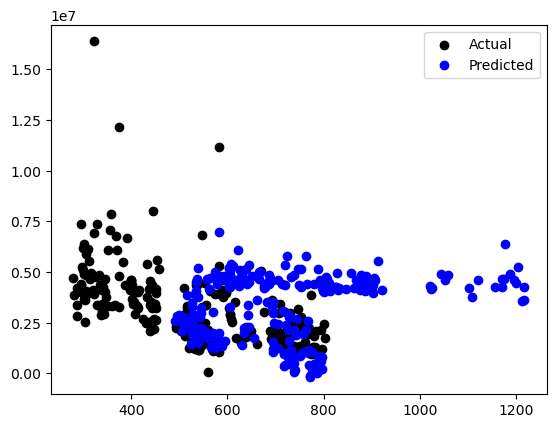

In [216]:
# Visualize model predictions vs actual values
plt.scatter(X_test['Open'], y_test, color='black', label='Actual')
plt.scatter(X_test['Close'], predictions, color='blue', label='Predicted')
plt.legend()
plt.show()
